# Explore Boston house price data and target variable

In [8]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
boston_df = pd.read_csv('Boston.csv', header=0)

Let's look at the overall characteristics of the data to ensure it is loaded correctly

In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


There are 506 observations for each variable so there are no missing values. There are 13 independent variables and all variables are numerical. Let's look at the summary statistics of the target variable medv:

In [4]:
boston_df.medv.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

In [5]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int(h)


Freeman Diaconis:  2


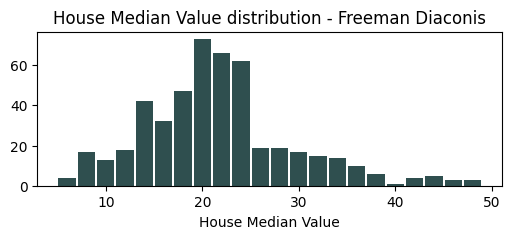

In [6]:
h = freeman_diaconis(boston_df.medv)
print("Freeman Diaconis: ", h)
mn = int(boston_df.medv.min())
mx = int(boston_df.medv.max())
bins = [i for i in range( mn, mx, h)]
figure = plt.figure(figsize=(6, 2))
axes = figure.add_subplot(1, 1, 1)
axes.hist(boston_df.medv,bins=bins, rwidth=0.9, color="darkslategray")
axes.set_title("House Median Value distribution - Freeman Diaconis")
axes.set_xlabel("House Median Value")

plt.show()
plt.close()

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

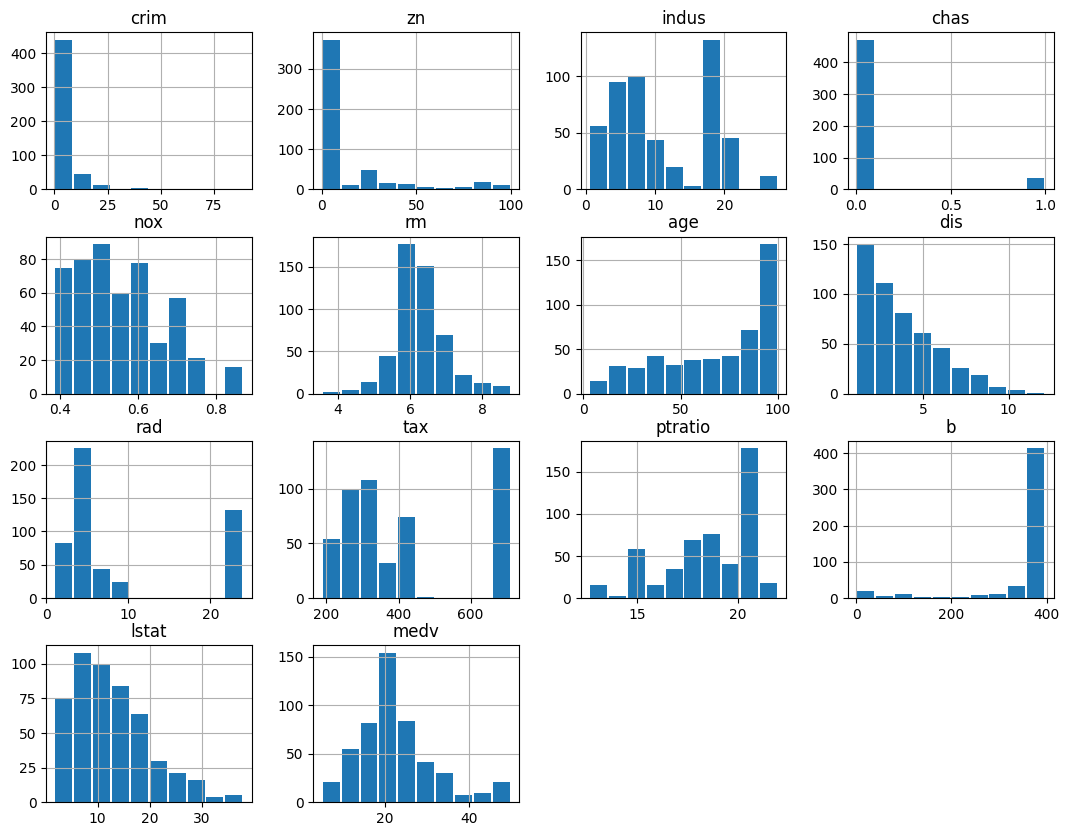

In [7]:
boston_df.hist(figsize=(13,10), rwidth=0.9)